<a href="https://colab.research.google.com/github/alanmoralesrz/AI-Class/blob/main/1870294_FBAct_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [781]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio


4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

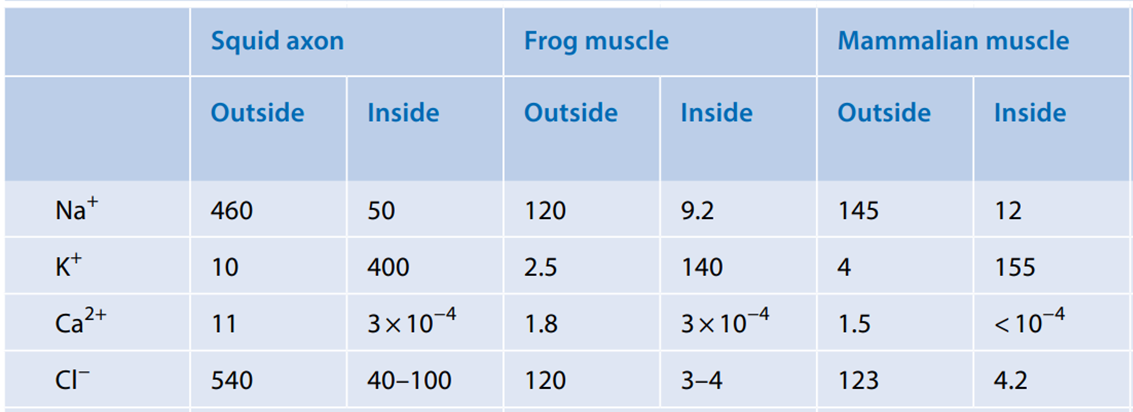

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [782]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [783]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [784]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

Definicion de variables para calcular el potencial de Nernst del K

In [785]:
K_in = Symbol('K_in')
K_out = Symbol('K_out')
Z_k = Symbol('Z_k')

Definicion de la funcion del potencial de Nernst del K

In [786]:
V_K = (-R*T/(Z_k*F))*log(K_in/K_out)
V_K

-R*T*log(K_in/K_out)/(F*Z_k)

Resultado esperado.


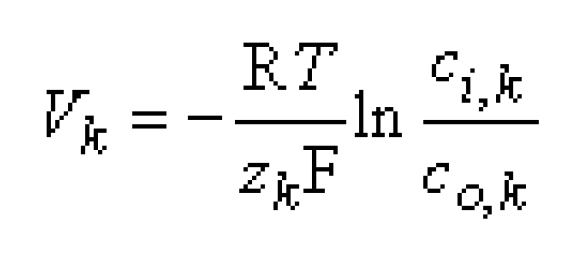

Asignacion de valores numericos a las variables de concentracion de K

In [787]:
# R = J/mol*K
# T = Grados Kelvin (a 25 C)
# F = C/mol
# Kin, Kout = mMolar

V_K_val = V_K.subs({R:8.314,
                T:298,
                F:96485,
                K_in:140,
                K_out:2.5,
                Z_k :1})
print(round((V_K_val)*1000),"mV")

-103 mV


Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [788]:
V_Na = V_K
V_Na

-R*T*log(K_in/K_out)/(F*Z_k)

In [789]:
V_Na_val = V_Na.subs({R:8.314,
                  T:298,
                  F:96485,
                  K_in:9.2,
                  K_out:120,
                  Z_k :1})
print(round((V_Na_val)*1000),"mV")

66 mV


In [790]:
V_Cl = V_K
V_Cl

-R*T*log(K_in/K_out)/(F*Z_k)

In [791]:
V_Cl_val=V_Cl.subs({R:8.314,
                T:298,
                F:96485,
                K_in:4,
                K_out:100,
                Z_k :-1})
print(round((V_Cl_val)*1000),"mV")

-83 mV


## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [792]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un calamar

P_Na=Symbol('P_Na')
P_K=Symbol('P_K')
P_Cl=Symbol('P_Cl')

Na_in=Symbol('Na_in')
Na_out=Symbol('Na_out')
Cl_in=Symbol('Cl_in')
Cl_out=Symbol('Cl_out')

# Integre las variables definiadas en la funcion de GHK
V_axon_calamar = (R*T/F)*log((P_Na*Na_out + P_K*K_out + P_Cl*Cl_in )/( P_Na*Na_in + P_K*K_in + P_Cl*Cl_out ) )
V_axon_calamar

R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [793]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_calamar_val = V_axon_calamar.subs({R:8.314,
                                          T:298,
                                          F:96485,
                                          K_in:400,
                                          K_out:10,
                                          Na_in:50,
                                          Na_out:460,
                                          Cl_in:100,
                                          Cl_out:540,
                                          P_K:1,
                                          P_Na:0.04,
                                          P_Cl:0.45})
print(round((V_axon_calamar_val)*1000),"mV")

-56 mV


Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [794]:
V_mammalian_muscle = V_axon_calamar.subs({R:8.314,
                                          T:298,
                                          F:96485,
                                          K_in:155,
                                          K_out:4,
                                          Na_in:12,
                                          Na_out:145,
                                          Cl_in:4.2,
                                          Cl_out:123,
                                          P_K:1,
                                          P_Na:0.04,
                                          P_Cl:0.45})
print(round((V_mammalian_muscle)*1000),"mV mammalian muscle")


V_frog_muscle = V_axon_calamar.subs({R:8.314,
                                          T:298,
                                          F:96485,
                                          K_in:140,
                                          K_out:2.5,
                                          Na_in:9.2,
                                          Na_out:120,
                                          Cl_in:4,
                                          Cl_out:100,
                                          P_K:2*(10^(-6)),
                                          P_Na:2*(10^(-8)),
                                          P_Cl:4*(10^(-6))})
print(round((V_frog_muscle)*1000),"mV frog muscle")

-74 mV mammalian muscle
-28 mV frog muscle


## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

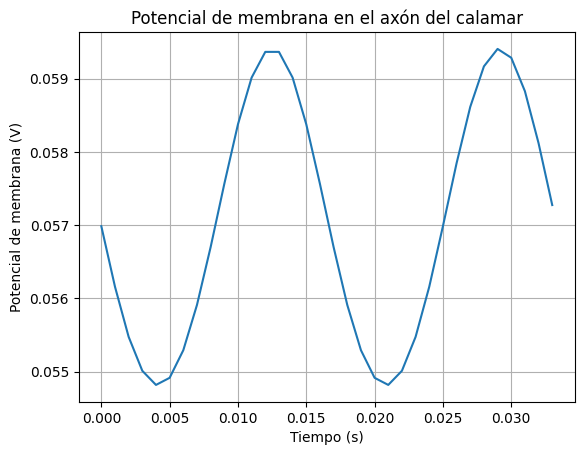

In [795]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, log

# Frecuencia y período
frecuencia = 60
Periodo = 1 / frecuencia

# Generar tiempo con mayor resolución temporal
tiempo = np.arange(0, 2 * Periodo, 0.001)

ENa = []
for t in tiempo:
    K_in_val = 50 + 5 * np.sin(2 * np.pi * frecuencia * t)
    K_out_val = 460 + 5 * np.sin(2 * np.pi * frecuencia * t)
    ENa.append(V_K.subs({R: 8.314,
                         T: 298,
                         F: 96485,
                         K_in: K_in_val,
                         K_out: K_out_val,
                         Z_k: 1}))

# Graficar el resultado
plt.plot(tiempo, ENa)
plt.title('Potencial de membrana en el axón del calamar')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencial de membrana (V)')
plt.grid(True)
plt.show()